In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
alpha = ["current_player_score","opponent_score","current_player_deadwood","current_player_num_hit_cards"]
beta = ["num_melds","point_sum_melds","num_combos","point_sum_combos","num_knock_cache","point_sum_knock_cache","num_load_cards","point_sum_load_cards","turns_taken"]
gamma = ["num_nearby_opponent_cards"]
delta = ["num_vis_cards_to_opponent"]

features = alpha + beta + gamma + delta

In [16]:
df = pd.read_csv('gamma-1.csv')
display(df.T)

np.set_printoptions(edgeitems = 200, linewidth = 150)
# df.values

,0,1,2,3,4,5,6,7,8,9,...,47712,47713,47714,47715,47716,47717,47718,47719,47720,47721
current_player,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
is_current_player_hand_winner,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
is_current_player_game_winner,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
current_player_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,72.0,72.0,22.0,22.0,22.0,72.0,72.0,72.0,72.0
opponent_score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,72.0,72.0,72.0,22.0,22.0,22.0,22.0
current_player_deadwood,48.0,43.0,43.0,35.0,48.0,58.0,48.0,35.0,43.0,34.0,...,57.0,37.0,27.0,62.0,72.0,62.0,27.0,19.0,10.0,10.0
current_player_num_hit_cards,1.0,3.0,2.0,0.0,1.0,3.0,1.0,0.0,2.0,0.0,...,13.0,11.0,11.0,4.0,6.0,4.0,11.0,6.0,6.0,6.0
num_melds,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0
point_sum_melds,24.0,12.0,16.0,16.0,24.0,24.0,24.0,16.0,16.0,16.0,...,0.0,29.0,29.0,0.0,0.0,0.0,29.0,38.0,38.0,38.0
num_combos,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,5.0,3.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,1.0


In [17]:
# features for regression input
f = alpha + gamma
# feature for regression output
g = "is_current_player_game_winner"

print("\n".join(f))
print("-------")
print(g)

var = "current_player_deadwood"

current_player_score
opponent_score
current_player_deadwood
current_player_num_hit_cards
num_nearby_opponent_cards
-------
is_current_player_game_winner


# Linear

CSV LINE:

0.4118056377,0.0050847424,-0.0050327459,-0.0022663566,0.0050243686,0,0,0,0,0,0,0,0,0,0.0025446114,0 


R^2:   0.12969751116596973 




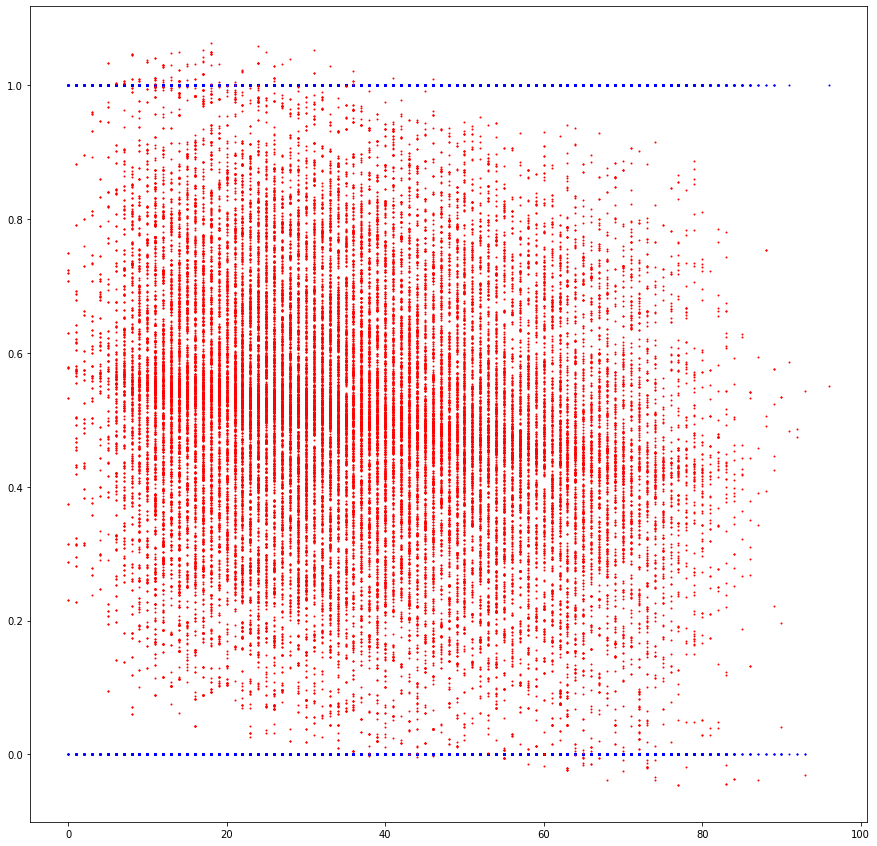

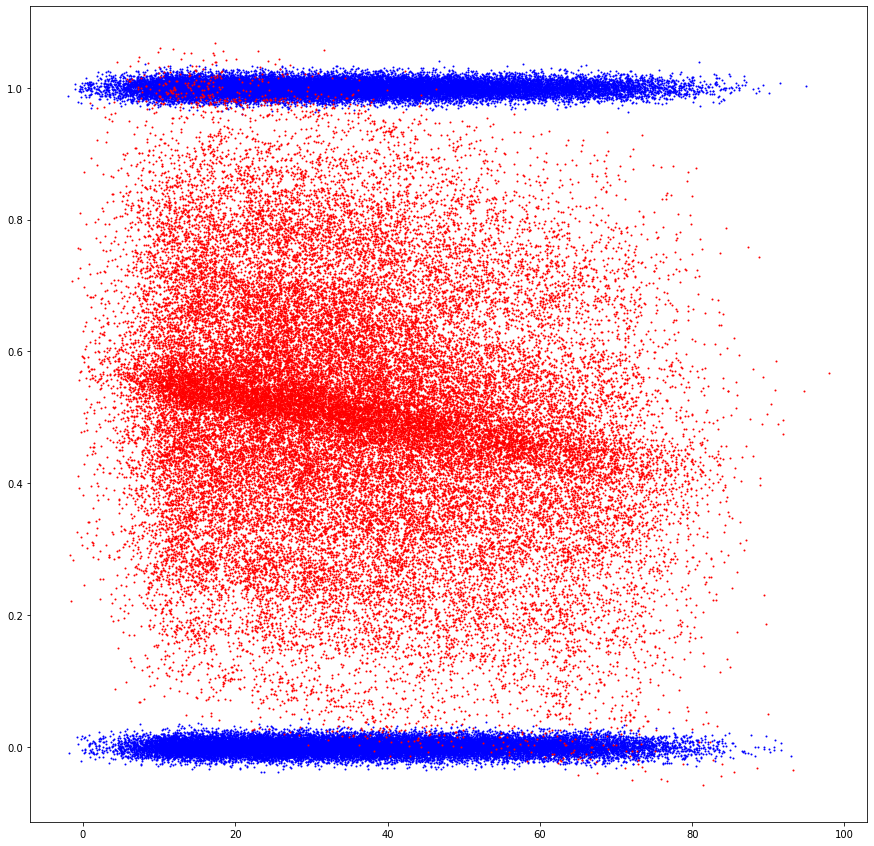

In [18]:
X = df[f]
y = df[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(features)):
    if features[i] in f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][f.index(features[i])])
    else:
        line += ",0"
print(line, "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

# Quadratic

In [47]:
# copy df to df2
# choose any two (not necessarily distinct) columns of df, multiply them coordinate wise, and append this column to df2

current_player_deadwood
current_player_num_hit_cards
num_nearby_opponent_cards
num_melds
point_sum_melds
num_combos
point_sum_combos
num_knock_cache
point_sum_knock_cache
num_load_cards
point_sum_load_cards
turns_taken
current_player_deadwood_$_current_player_deadwood
current_player_deadwood_$_current_player_num_hit_cards
current_player_deadwood_$_num_melds
current_player_deadwood_$_point_sum_melds
current_player_deadwood_$_num_combos
current_player_deadwood_$_point_sum_combos
current_player_deadwood_$_num_knock_cache
current_player_deadwood_$_point_sum_knock_cache
current_player_deadwood_$_num_load_cards
current_player_deadwood_$_point_sum_load_cards
current_player_deadwood_$_turns_taken
current_player_deadwood_$_num_nearby_opponent_cards
current_player_num_hit_cards_$_current_player_num_hit_cards
current_player_num_hit_cards_$_num_melds
current_player_num_hit_cards_$_point_sum_melds
current_player_num_hit_cards_$_num_combos
current_player_num_hit_cards_$_point_sum_combos
current_play

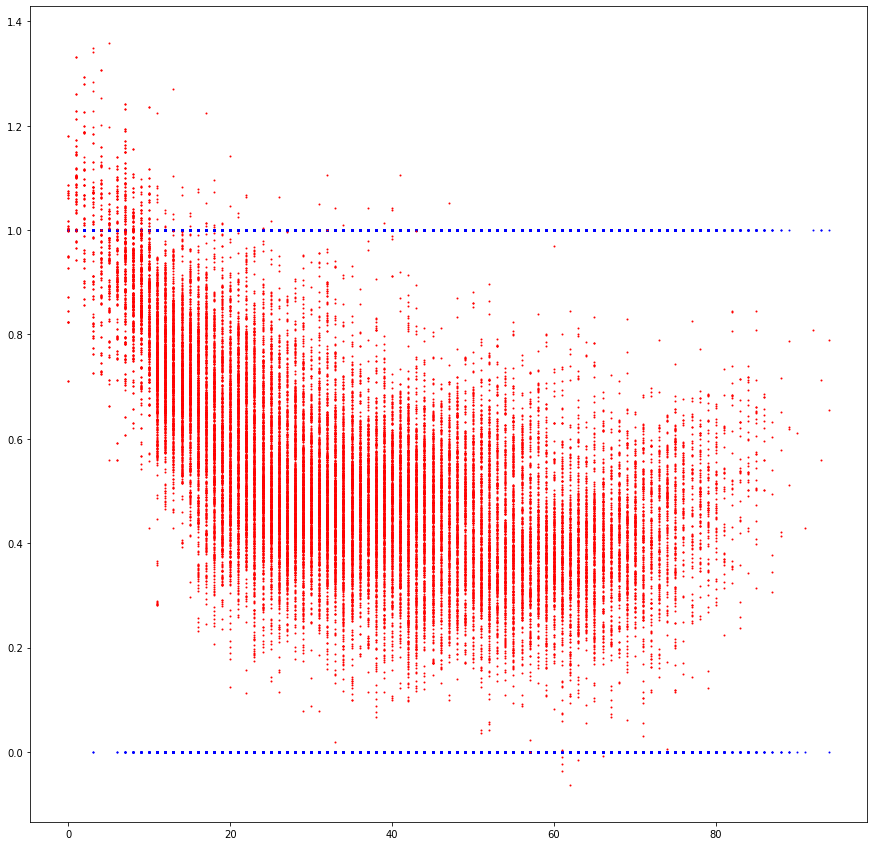

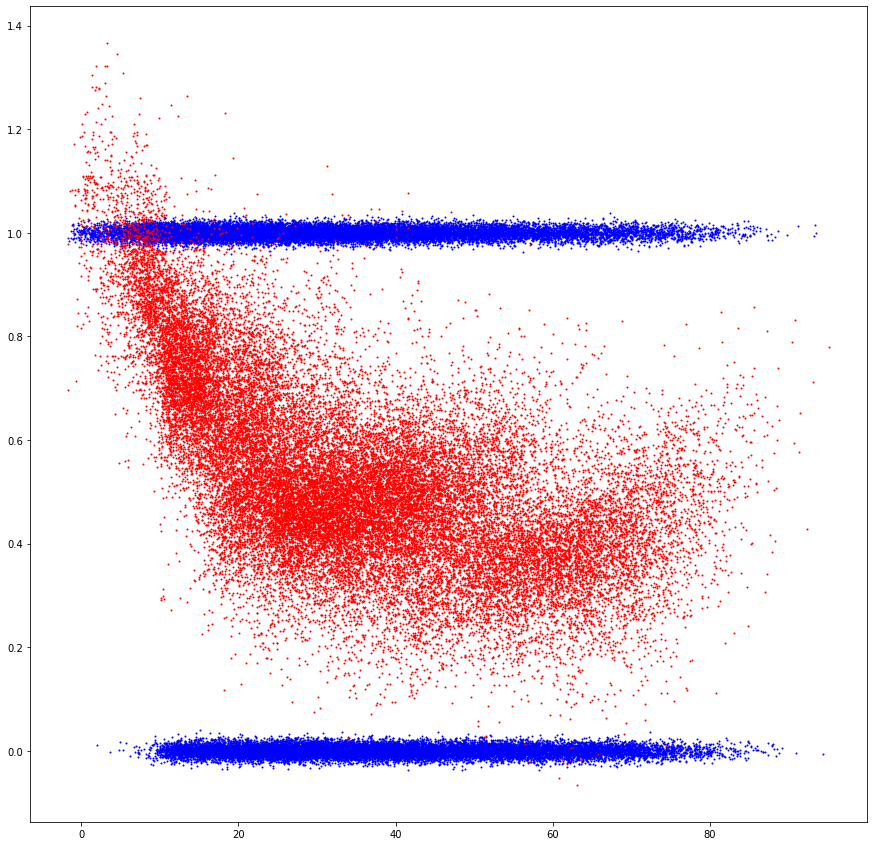

In [65]:
df2 = df.copy()

quadratic_f = f.copy()
quadratic_features = features.copy()

for i in range(len(features)):
    for j in range(i, len(features)):
        new_feature = features[i] + "_$_" + features[j]
        df2[new_feature] = df[features[i]] *  df[features[j]]
        quadratic_features += [new_feature]
        if features[i] in f and features[j] in f:
            quadratic_f += [new_feature]

print("\n".join(quadratic_f), "\n\n")            

X = df2[quadratic_f]
y = df2[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(quadratic_features)):
    if quadratic_features[i] in quadratic_f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][quadratic_f.index(quadratic_features[i])])
    else:
        line += ",0"
print(line, "\n\n")



print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)

fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()


# logistic

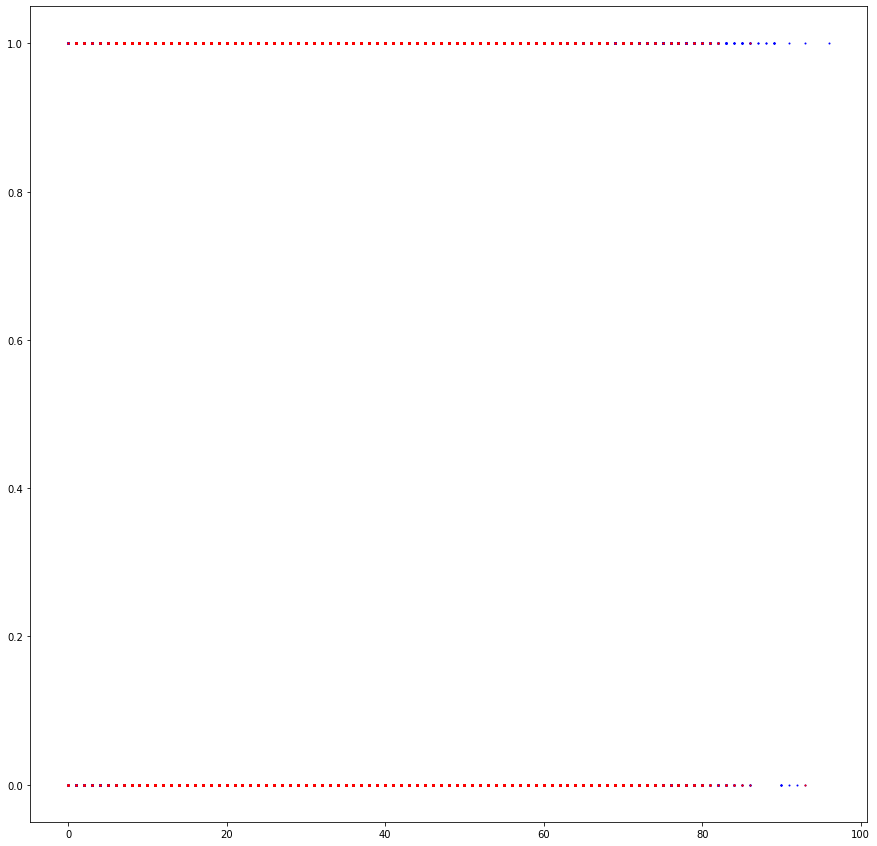

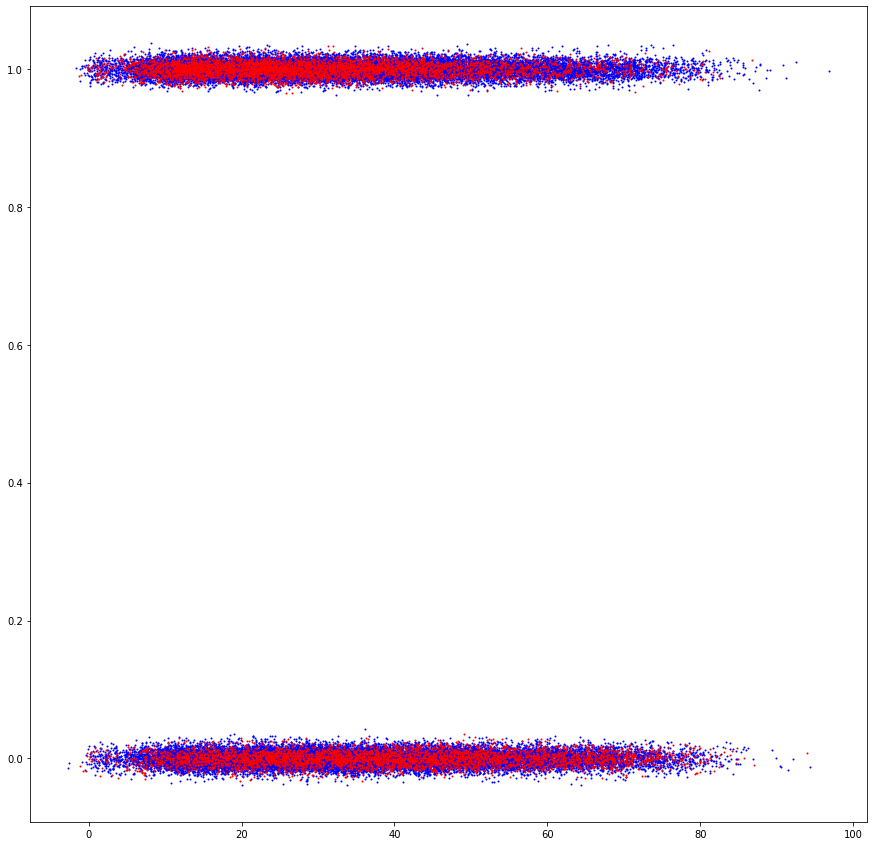

In [21]:
X = df[f]
y = df[["is_current_player_game_winner"]]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train.values.T[0])
y_pred=logistic_regression.predict(X_test)

model = LogisticRegression().fit(X_train, y_train.values.T[0])

predictions = model.predict(X_test)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X_test[['current_player_deadwood']].values.T[0], predictions, s=1, color='red')
plt.show()

fig = plt.figure(figsize=(15,15))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X_test[['current_player_deadwood']].values.T[0]), jitter(predictions), s=1, color='red')
plt.show()

# Neural Network

In [16]:
from keras.models import Sequential, load_model
from keras.layers import Dense

X = df[f].values
y = df[[g]].values

model = Sequential()
model.add(Dense(len(X[0]), input_dim=len(X[0]), activation='sigmoid'))
model.add(Dense(len(X[0])//2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X, y, epochs=50, batch_size=15)

Epoch 1/50
33859/33859 [==============================] - 1s 40us/step - loss: 0.6599 - accuracy: 0.6223
Epoch 2/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.5132 - accuracy: 0.7788
Epoch 3/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4841 - accuracy: 0.7801
Epoch 4/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4740 - accuracy: 0.7796
Epoch 5/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4698 - accuracy: 0.7813
Epoch 6/50
33859/33859 [==============================] - 1s 36us/step - loss: 0.4679 - accuracy: 0.7792
Epoch 7/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4671 - accuracy: 0.7791
Epoch 8/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4664 - accuracy: 0.7793
Epoch 9/50
33859/33859 [==============================] - 1s 37us/step - loss: 0.4659 - accuracy: 0.7804
Epoch 10/50
33859/33859 [==============================

In [9]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

33859/33859 [==============================] - 0s 7us/step
Accuracy: 78.10


In [10]:
model.save("gamma.h5")

In [4]:
import keras
import numpy as np

In [5]:
m = keras.models.load_model("../GinRummyAI/regression_models/gamma.h5")

In [6]:
m.predict(np.array([[ 0.,  0., 69.,  6.,  1.]]))[0][0]

0.383214

In [26]:
X[[0]]

array([[ 0.,  0., 60.,  9.,  0.]])

In [7]:
help(m)

Help on Sequential in module keras.engine.sequential object:

class Sequential(keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |      name: Name given to the model
 |  
 |  # Example
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model

In [244]:
for obj in model.weights:
    print(obj.numpy().T, "\n")

[[-0.10649802  0.09712528 -0.01368238  0.34301138 -0.05350536]
 [-0.08400655  0.09604126  0.06177868 -0.6259904   0.26682198]
 [ 0.17847039 -0.02682551 -0.00693896 -0.8394289  -0.22979254]
 [-0.57901204  0.51400864  0.22103995 -0.26751083  0.48125052]
 [ 0.3647178  -0.6540233  -0.13085656  0.4855501   0.16004123]] 

[-3.418664   -2.8350232  -4.7416153  -1.2332332  -0.11645204] 

[[ 1.6262398   0.9956975   1.043168    0.03291409 -2.0053866 ]
 [-1.6058668  -1.1802657   1.6791301  -0.51399213  0.50049734]] 

[-0.18092276  0.69219935] 

[[-1.4306599  1.4407469]] 

[-0.00559682] 



m|a|t|r|i|x
&
vector

||

m|a|t|r|i|x
&
vector
||
.
.
.
||
m|a|t|r|i|x
vector